In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re


In [4]:
df = pd.read_csv('Youtube-Spam-Dataset.csv', encoding='unicode_escape')
df

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^...,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,PSY - GANGNAM STYLE(?????) M/V,1
...,...,...,...,...,...,...
1951,_2viQ_Qnc6-bMSjqyL1NKj57ROicCSJV5SwTrw-RFFA,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0
1952,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0
1953,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0
1954,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [6]:
df.describe()

,CLASS
count,1956.000000
mean,0.513804
std,0.499937
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
df.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'VIDEO_NAME', 'CLASS'], dtype='object')

In [8]:
df['CLASS'].unique()

array([1, 0], dtype=int64)

In [9]:
df['CONTENT'].value_counts()

CONTENT
Check out this video on YouTube:ï»¿                                          97
Check out this playlist on YouTube:ï»¿                                       21
Check Out The New Hot Video By Dante B Called Riled Up                        6
Shakira :-*                                                                   4
Likeï»¿                                                                       4
                                                                             ..
;-)ï»¿                                                                        1
HONESTLY, I WANNA SEE YOU BE BRAVE! oh wait...ï»¿                             1
I LOVE YOU KATTY PERRY &lt;3 ï»¿                                              1
She is good. Does she make any more music? If she doesn't, she should!ï»¿     1
Shakira is the best dancer                                                    1
Name: count, Length: 1760, dtype: int64

# 1. Exploratory Data Analysis (EDA):

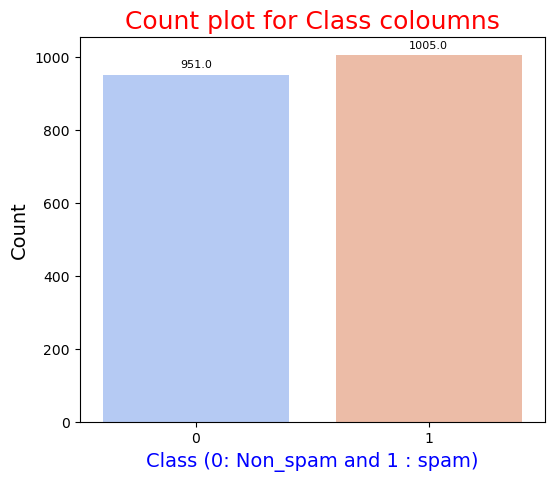

In [36]:
plt.figure(figsize=(6,5))
ax = sns.countplot(x=df['CLASS'], data=df, color='#FF00FF', palette='coolwarm')
# Add data labels on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Count plot for Class coloumns', c='r', fontsize=18)
plt.xlabel('Class (0: Non_spam and 1 : spam)', c='b',fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

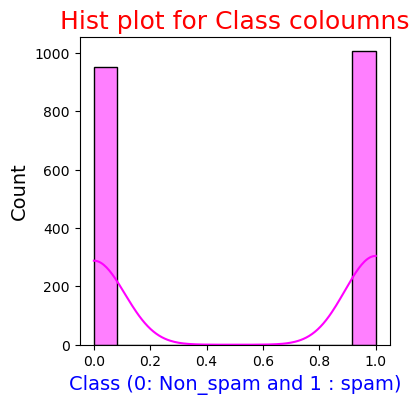

In [33]:
plt.figure(figsize=(4,4))
sns.histplot(x=df['CLASS'], data=df, color='#FF00FF', kde=True)
plt.title('Hist plot for Class coloumns', c='r', fontsize=18)
plt.xlabel('Class (0: Non_spam and 1 : spam)', c='b',fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

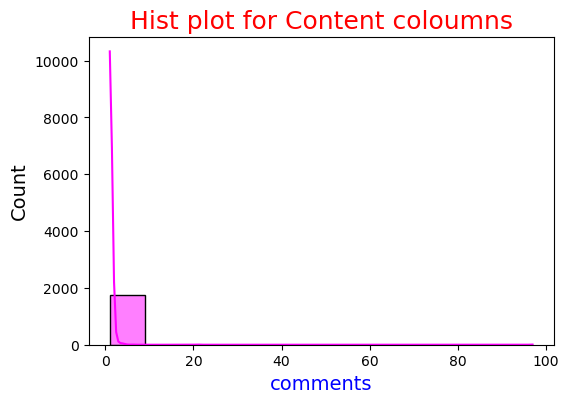

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(x=df['CONTENT'].value_counts(), data=df, color='#FF00FF', kde=True)
plt.title('Hist plot for Content coloumns', c='r', fontsize=18)
plt.xlabel('comments', c='b',fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [44]:
from wordcloud import WordCloud

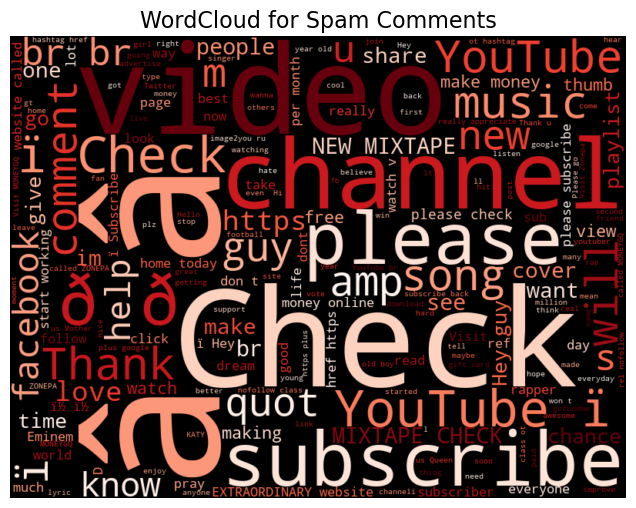

In [45]:
spam_coments = ' '.join(df[df['CLASS']==1]['CONTENT'])
word_cloud = WordCloud(width=800, height=600, background_color='black', colormap='Reds').generate(spam_coments)
plt.figure(figsize=(10, 6))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Spam Comments', fontsize=16)
plt.show()

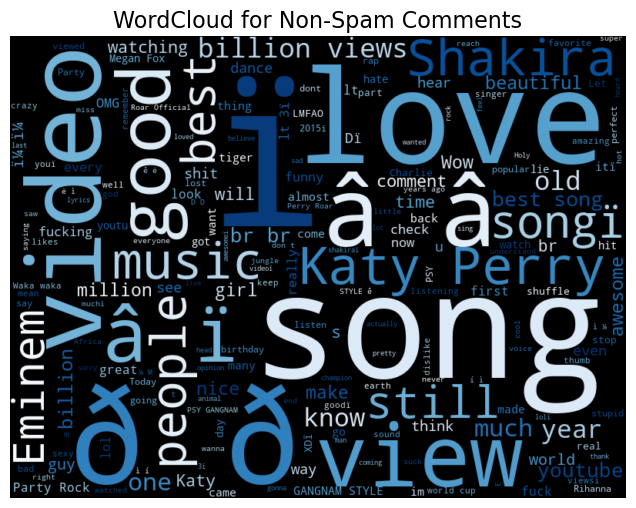

In [47]:
non_spam_comments = ' '.join(df[df['CLASS'] == 0]['CONTENT'])
non_spam_wordcloud = WordCloud(width=800, height=600, background_color='black', colormap='Blues').generate(non_spam_comments)

plt.figure(figsize=(10, 6))
plt.imshow(non_spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Non-Spam Comments', fontsize=16)
plt.show()

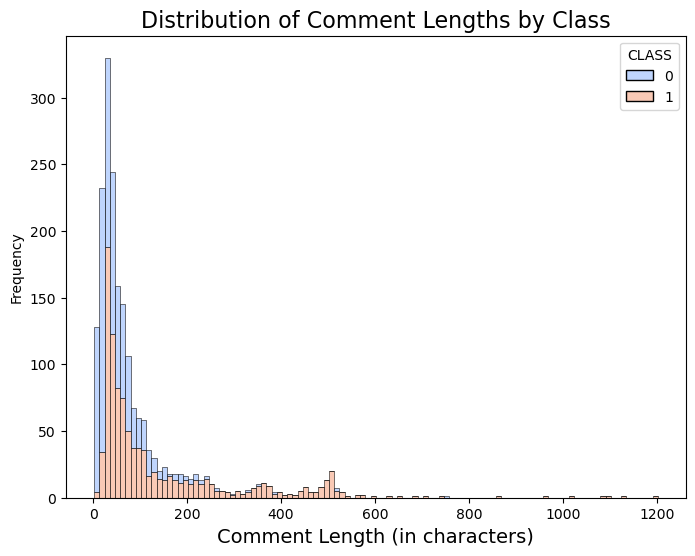

In [49]:
df['Comment Length'] = df['CONTENT'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(df, x='Comment Length', hue='CLASS', multiple='stack', palette='coolwarm')
plt.title('Distribution of Comment Lengths by Class', fontsize=16)
plt.xlabel('Comment Length (in characters)', fontsize=14)
plt.ylabel('Frequency')
plt.show()


 Group by class and calculate the mean comment length

In [50]:
print(df.groupby('CLASS')['Comment Length'].mean())

CLASS
0     52.604627
1    140.843781
Name: Comment Length, dtype: float64


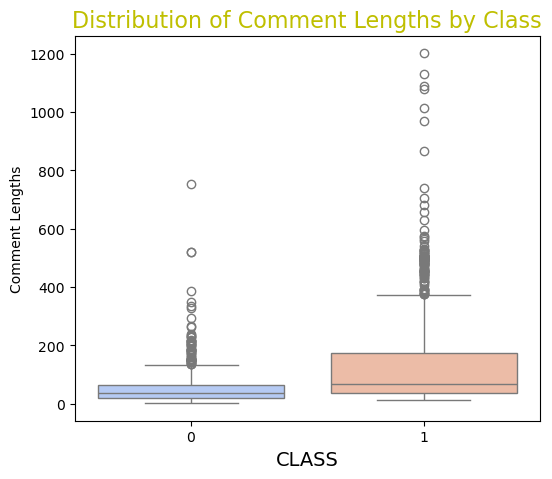

In [55]:
plt.figure(figsize=(6, 5))
sns.boxplot(df, x='CLASS', y='Comment Length', palette='coolwarm')
plt.title('Distribution of Comment Lengths by Class', fontsize=16, c='y')
plt.xlabel('CLASS', fontsize=14)
plt.ylabel('Comment Lengths')
plt.show()

 Top 10 most frequent authors

In [56]:
authors = df['AUTHOR'].value_counts()

In [62]:
top_ten= authors.head(10)
top_ten

AUTHOR
M.E.S              8
5000palo           7
Louis Bryant       7
Shadrach Grentz    7
DanteBTV           6
LuckyMusiqLive     5
Derek Moya         5
Hidden Love        5
Laura Brown        4
James Cook         4
Name: count, dtype: int64

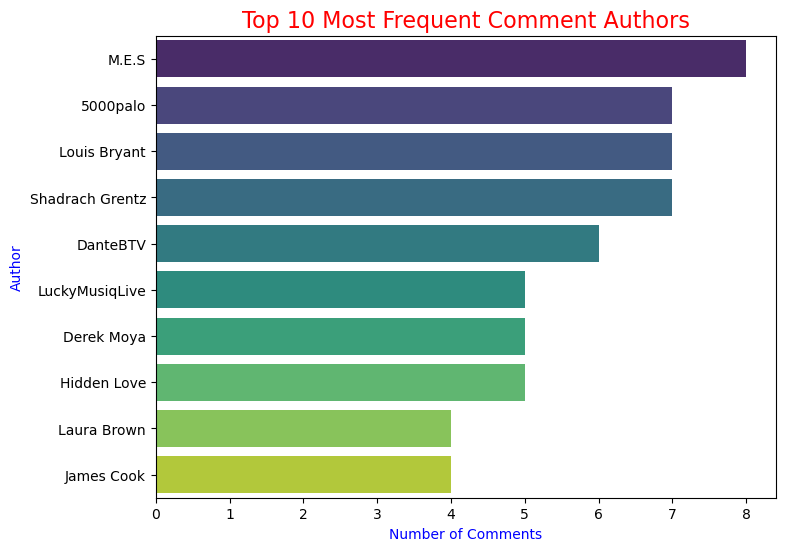

In [71]:
plt.figure(figsize=(8, 6))
sns.barplot( x=top_ten.values, y=top_ten.index, palette='viridis')
plt.title('Top 10 Most Frequent Comment Authors', fontsize=16, c='r')
plt.xlabel('Number of Comments', c='b')
plt.ylabel('Author', c='b')
plt.show()

Plot the daily trend of spam and non-spam comments

In [83]:
df.head(8)

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,Comment Length,Date
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1,56,NaT
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1,166,NaT
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1,38,NaT
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^...,PSY - GANGNAM STYLE(?????) M/V,1,50,NaT
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,PSY - GANGNAM STYLE(?????) M/V,1,41,NaT
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",PSY - GANGNAM STYLE(?????) M/V,1,82,NaT
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ï»¿,PSY - GANGNAM STYLE(?????) M/V,1,27,NaT
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,PSY - GANGNAM STYLE(?????) M/V,0,80,NaT


In [84]:
df['DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1956 entries, 0 to 1955
Series name: DATE
Non-Null Count  Dtype 
--------------  ----- 
1711 non-null   object
dtypes: object(1)
memory usage: 15.4+ KB


In [85]:
df['Date'] = pd.to_datetime(df['DATE'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')
df['Date']

0                          NaT
1                          NaT
2                          NaT
3                          NaT
4                          NaT
                 ...          
1951   2013-07-13 13:27:39.441
1952   2013-07-13 13:14:30.021
1953   2013-07-13 12:09:31.188
1954   2013-07-13 11:17:52.308
1955   2013-07-12 22:33:27.916
Name: Date, Length: 1956, dtype: datetime64[ns]

In [86]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1956 entries, 0 to 1955
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
1009 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 15.4 KB


Group by date and count the number of spam and non-spam comments per day

In [88]:
daily_counts = df.groupby([df['Date'].dt.date, 'CLASS']).size().unstack(fill_value=0)

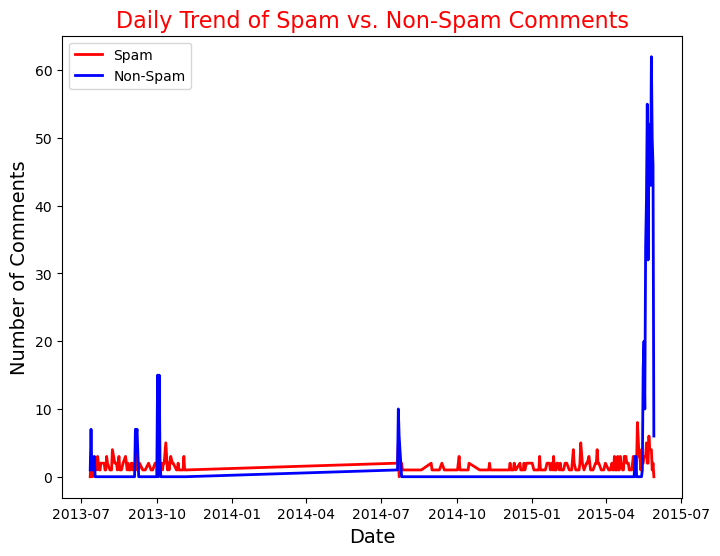

In [93]:
plt.figure(figsize=(8, 6))
plt.plot(daily_counts.index, daily_counts[1], label='Spam', color='red', linewidth=2)
plt.plot(daily_counts.index, daily_counts[0], label='Non-Spam', color='blue', linewidth=2)
plt.title('Daily Trend of Spam vs. Non-Spam Comments', fontsize=16, c='r')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.legend()
plt.show()

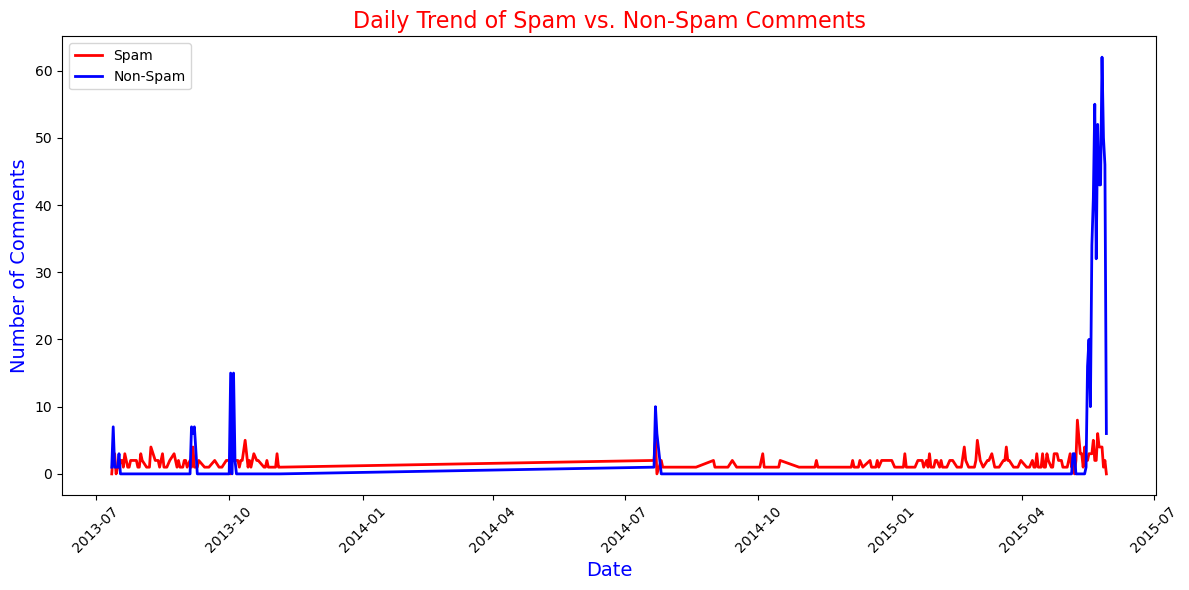

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts[1], label='Spam', color='red', linewidth=2)
plt.plot(daily_counts.index, daily_counts[0], label='Non-Spam', color='blue', linewidth=2)
plt.title('Daily Trend of Spam vs. Non-Spam Comments', fontsize=16, c='r')
plt.xlabel('Date', fontsize=14, c='b')
plt.ylabel('Number of Comments', fontsize=14,c='b')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

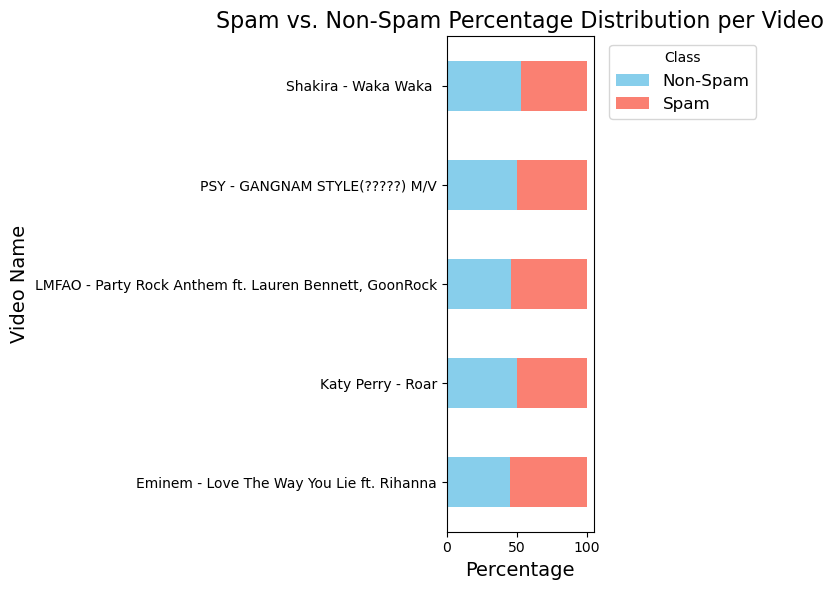

In [103]:
video_class_counts = df.groupby(['VIDEO_NAME', 'CLASS']).size().unstack(fill_value=0)

# Calculate the percentage for each class (spam/non-spam)
video_class_percent = video_class_counts.div(video_class_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar plot for spam vs. non-spam distribution per video (horizontal)
plt.figure(figsize=(8, 6))
ax = video_class_percent.plot(kind='barh', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())

# Move the legend outside of the plot
ax.legend(title='Class', labels=['Non-Spam', 'Spam'], fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Spam vs. Non-Spam Percentage Distribution per Video', fontsize=16)
plt.ylabel('Video Name', fontsize=14)
plt.xlabel('Percentage', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

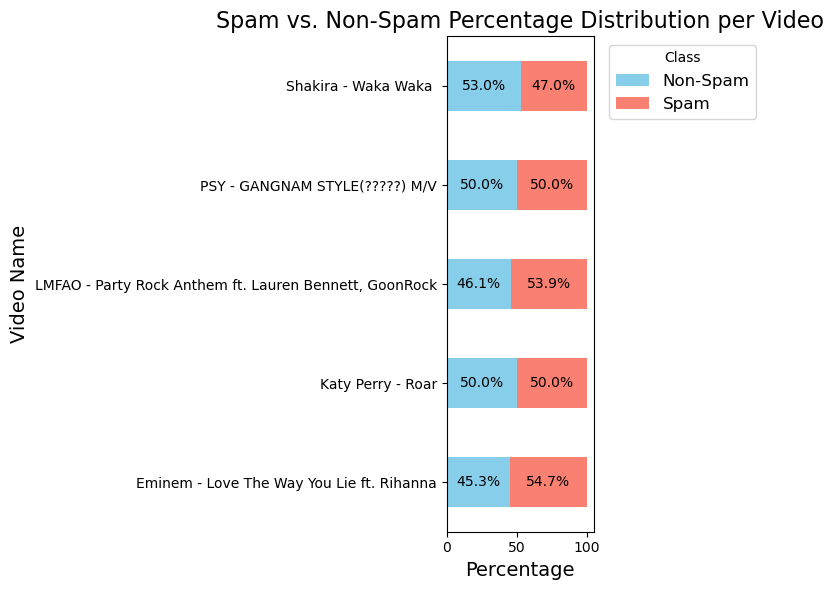

In [105]:
video_class_counts = df.groupby(['VIDEO_NAME', 'CLASS']).size().unstack(fill_value=0)

# Calculate the percentage for each class (spam/non-spam)
video_class_percent = video_class_counts.div(video_class_counts.sum(axis=1), axis=0) * 100

# Plot the stacked bar plot for spam vs. non-spam distribution per video (horizontal)
plt.figure(figsize=(8, 6))
ax = video_class_percent.plot(kind='barh', stacked=True, color=['skyblue', 'salmon'], ax=plt.gca())

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='black')

# Move the legend outside of the plot
ax.legend(title='Class', labels=['Non-Spam', 'Spam'], fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Spam vs. Non-Spam Percentage Distribution per Video', fontsize=16)
plt.ylabel('Video Name', fontsize=14)
plt.xlabel('Percentage', fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

# Data Cleaning and Preprocessing

In [107]:
df.isnull().sum()

COMMENT_ID          0
AUTHOR              0
DATE              245
CONTENT             0
VIDEO_NAME          0
CLASS               0
Comment Length      0
Date              947
dtype: int64

In [108]:
# Drop rows which null Date
df.dropna(inplace=True)

In [109]:
df.isnull().sum()

COMMENT_ID        0
AUTHOR            0
DATE              0
CONTENT           0
VIDEO_NAME        0
CLASS             0
Comment Length    0
Date              0
dtype: int64

In [110]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS,Comment Length,Date
700,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...","LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",0,86,2015-05-28 21:39:52.376
701,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funnyï»¿,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",0,18,2015-05-28 20:07:20.610
702,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...","LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",1,502,2015-05-28 19:23:35.355
703,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!ï»¿,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",0,46,2015-05-28 17:49:35.294
704,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rockï»¿,"LMFAO - Party Rock Anthem ft. Lauren Bennett, ...",0,13,2015-05-28 16:28:26.818


In [111]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [121]:
def proceess_content(text):
    text = text.lower()

     # remove puntuations
    text = re.sub(r"[^\w\s]", "", text)

    # remove numbers
    text = re.sub(r"\d+", "", text)

    #split text into tokens
    tokens = word_tokenize(text)

    #remove stopwords
    stop_wprds = set(stopwords.words("English"))
    tokens = [word for word in tokens if word not in stop_wprds]

    return " ".join(tokens)

In [122]:
df['process_content'] = df['CONTENT'].apply(proceess_content)

# Create bags of words using TfidVectorizer

In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features=1500)
feature = tfv.fit_transform(df['process_content'])

In [126]:
feature

<1009x1500 sparse matrix of type '<class 'numpy.float64'>'
	with 5657 stored elements in Compressed Sparse Row format>

In [131]:
feature_cv = feature.toarray()
feature_cv

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [132]:
feature_cv.shape

(1009, 1500)

# Train test split

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature_cv, df['CLASS'], random_state=42, test_size=0.2)

In [134]:
X_train.shape

(807, 1500)

In [135]:
X_test.shape

(202, 1500)

# Create Model Naive Bayesian classifier for prediction test

In [136]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [137]:
nb.score(X_test,y_test)

0.9108910891089109

In [138]:
y_predic = nb.predict(X_test)

In [139]:
from sklearn.metrics import classification_report
print(f"Naive bayesian Report : \n{classification_report(y_predic, y_test)}")

Naive bayesian Report : 
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       129
           1       0.84      0.93      0.88        73

    accuracy                           0.91       202
   macro avg       0.90      0.92      0.91       202
weighted avg       0.92      0.91      0.91       202



In [141]:
from sklearn.metrics import confusion_matrix
confu_m = confusion_matrix(y_test,y_predic)
confu_m

array([[116,   5],
       [ 13,  68]], dtype=int64)

# Build model using RandomForest Classifier

In [142]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [143]:
rf.score(X_test, y_test)

0.9455445544554455

In [144]:
y_predic = rf.predict(X_test)

In [145]:

print(f"RandomForestClassifier Report : \n{classification_report(y_test, y_predic)}")

RandomForestClassifier Report : 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       121
           1       1.00      0.86      0.93        81

    accuracy                           0.95       202
   macro avg       0.96      0.93      0.94       202
weighted avg       0.95      0.95      0.94       202



In [146]:
print(f"RandomForestClassifier Confussion metrix : \n{confusion_matrix(y_test, y_predic)}")

RandomForestClassifier Confussion metrix : 
[[121   0]
 [ 11  70]]


# Build model using Logistic Regression

In [147]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train, y_train)


LogisticRegression()

In [148]:
lgr.score(X_test,y_test)

0.905940594059406

In [149]:
y_predic = lgr.predict(X_test)
print(f"RandomForestClassifier Report : \n{classification_report(y_test, y_predic)}")

RandomForestClassifier Report : 
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       121
           1       0.98      0.78      0.87        81

    accuracy                           0.91       202
   macro avg       0.93      0.88      0.90       202
weighted avg       0.92      0.91      0.90       202



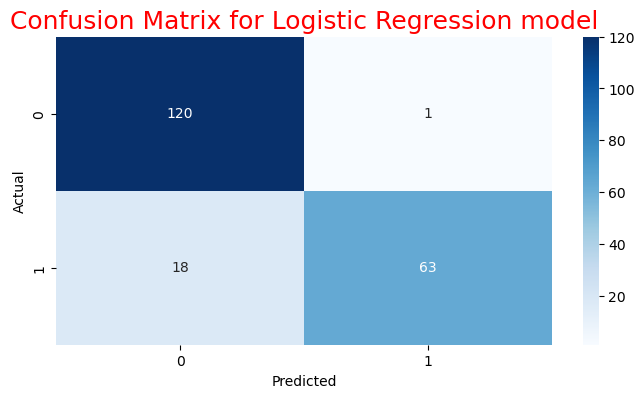

In [153]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predic)
plt.figure(figsize=(8,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression model', fontsize=18, c='r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create model usng DecitionTree Classifier

In [155]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [156]:
dt.score(X_test, y_test)

0.9455445544554455

In [162]:
y_predic =dt.predict(X_test)
print(f"DecisionTree Classifier Report : \n{classification_report(y_predic, y_test )}")

DecisionTree Classifier Report : 
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       130
           1       0.88      0.99      0.93        72

    accuracy                           0.95       202
   macro avg       0.93      0.95      0.94       202
weighted avg       0.95      0.95      0.95       202



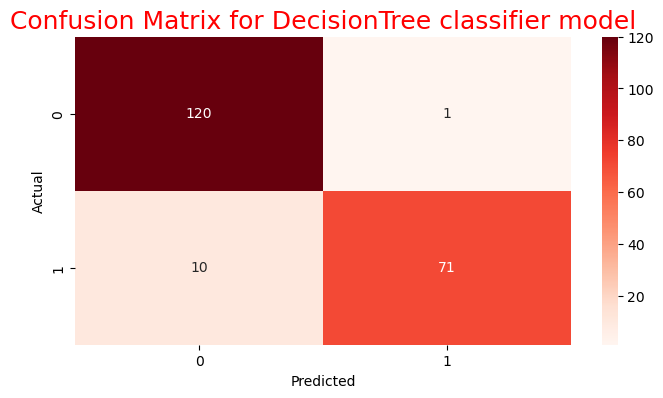

In [163]:
conf_matrix = confusion_matrix(y_test, y_predic)
plt.figure(figsize=(8,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix for DecisionTree classifier model', fontsize=18, c='r')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()